<a href="https://colab.research.google.com/github/ellieytc/CaseStudy.DeepLearning/blob/master/Food_FinalModel_resampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Wed Aug 26 18:22:28 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.57       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   75C    P8    12W /  70W |      0MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [42]:
import os
import zipfile
from google.colab import drive
drive.mount('/content/drive')

path = '/content/drive/My Drive/Tibame/dataset/food_img.zip'

zip_ref = zipfile.ZipFile(path, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

os.chdir('/tmp/food_img')
os.listdir('/tmp/food_img')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


['carrot',
 'cucumber',
 'cabbage',
 '.ipynb_checkpoints',
 'radish',
 'chicken',
 'egg',
 'apple',
 'tomato',
 'potato',
 'mushroom']

In [7]:
import pandas as pd
import numpy as np
from numpy import argmax
import matplotlib.pyplot as plt
import seaborn as sns
import random
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras import utils as np_utils
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [5]:
def read_and_process_image(data_dir,width=32, height=32, channels=3, preprocess=False):
    train_classes= [data_dir + "/" +  i for i in os.listdir(data_dir) ]
    train_images = []
    for train_class in train_classes:
        train_images= train_images + [train_class + "/" + i for i in os.listdir(train_class)]
    random.shuffle(train_images)
    print(train_images[0:10])

    def read_image(file_path, preprocess):
        img = image.load_img(file_path, target_size=(height, width))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        # if preprocess:
            # x = preprocess_input(x)
        return x
    
    def prep_data(images, preprocess):
        count = len(images)
        data = np.ndarray((count, height, width, channels), dtype = np.float32)
        print(data.shape)
        for i, image_file in enumerate(images):
            image = read_image(image_file, preprocess)
            data[i] = image
        return data

    def read_labels(file_path):
        labels = []
        for i in file_path:
            if 'apple' in i:
                label = 0
            elif 'cabbage' in i:
                label = 1
            elif 'carrot' in i:
                label = 2
            elif 'chicken' in i:
                label = 3
            elif 'cucumber' in i:
                label = 4
            elif 'egg' in i:
                label = 5
            elif 'mushroom' in i:
                label = 6
            elif 'potato' in i:
                label = 7
            elif 'radish' in i:
                label = 8
            elif 'tomato' in i:
                label = 9
            labels.append(label)
        
        return labels
    
    X = prep_data(train_images, preprocess)
    labels = read_labels(train_images)
    
    assert X.shape[0] == len(labels)
    
    #print("Train shape: {}".format(X.shape))
    #print("Train shape: {}".format(len(labels)))
    return X, labels

x,y = read_and_process_image('/tmp/food_img') 

['/tmp/food_img/apple/apple_173.jpg', '/tmp/food_img/egg/egg_989.jpg', '/tmp/food_img/tomato/tomato_196.jpg', '/tmp/food_img/apple/apple_792.jpg', '/tmp/food_img/radish/radish_118.jpg', '/tmp/food_img/egg/egg_345.jpg', '/tmp/food_img/carrot/carrot_491.jpg', '/tmp/food_img/tomato/tomato_849.jpg', '/tmp/food_img/cucumber/cucumber_738.jpg', '/tmp/food_img/mushroom/mushroom_234.jpg']
(6972, 32, 32, 3)


In [8]:
# create train/test dataset
x_train , x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=100)

# 圖片特徵值標準化
x_train = x_train / 255
x_test = x_test / 255

#label以onehot encoding轉換     
y_train = np_utils.to_categorical(y_train)
y_test_categories = y_test
y_test = np_utils.to_categorical(y_test)

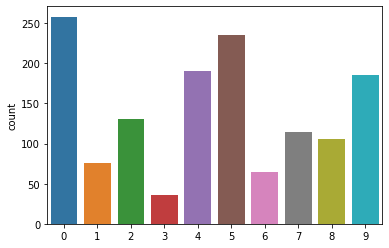

In [9]:
sns.countplot(y_test_categories)

In [10]:
# Oversampling
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=2) # ratio = 'minority'
x_train_reshape = x_train.reshape(x_train.shape[0],32*32*3)
x_test_reshape = x_test.reshape(x_test.shape[0],32*32*3)
x_train_res, y_train_res = sm.fit_sample(x_train_reshape, y_train)

print('Bfter Oversampling: ', y_train.shape[0])
print('After Oversampling: ', y_train_res.shape[0])

Bfter Oversampling:  5577
After Oversampling:  11500


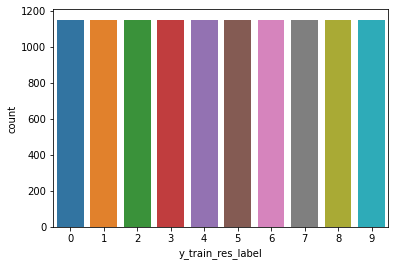

In [11]:
# reverse the y_train_res and plot
y_train_res_df = pd.DataFrame(argmax(y_train_res, axis=1),columns=['y_train_res_label'])
sns.countplot(y_train_res_df['y_train_res_label'])

In [12]:
x_train_res = x_train_res.reshape(x_train_res.shape[0], 32, 32, 3)
print('Bfter Oversampling: ')
print('x_train.shape={}, y_train.shape={}\n'.format(x_train.shape, y_train.shape))
print('After Oversampling: ')
print('x_train_res.shape={}, y_train_res.shape={}'.format(x_train_res.shape, y_train_res.shape))
print('x_test.shape={}, y_test.shape={}'.format(x_test.shape, y_test.shape))

Bfter Oversampling: 
x_train.shape=(5577, 32, 32, 3), y_train.shape=(5577, 10)

After Oversampling: 
x_train_res.shape=(11500, 32, 32, 3), y_train_res.shape=(11500, 10)
x_test.shape=(1395, 32, 32, 3), y_test.shape=(1395, 10)


In [13]:
# Split training set to create a validation set
x_train_res, x_val, y_train_res, y_val = train_test_split(x_train_res, y_train_res, test_size=0.2, random_state=115)
print('x_train_res.shape={}, y_train_res.shape={}'.format(x_train_res.shape, y_train_res.shape))
print('x_val.shape={}, y_val.shape={}'.format(x_val.shape, y_val.shape))

x_train_res.shape=(9200, 32, 32, 3), y_train_res.shape=(9200, 10)
x_val.shape=(2300, 32, 32, 3), y_val.shape=(2300, 10)


In [37]:
from keras.models import Sequential
from keras import layers
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation,GlobalMaxPooling2D
from keras import applications
from keras.applications.resnet50 import ResNet50
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from tensorflow.keras.models import load_model
import keras

image_size = 200
input_shape = (image_size, image_size, 3)
epochs = 50
batch_size = 24

# 以訓練好的 ResNet50 為基礎來建立模型
# 捨棄 ResNet50 頂層的 fully connected layers
base_model = ResNet50(include_top=False, 
            weights='imagenet',
            input_shape=input_shape)

x = base_model.output
x = GlobalMaxPooling2D()(x)
x = Dropout(0.5)(x)
predictions = Dense(10, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

model.compile(loss='categorical_crossentropy',
       optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),
      metrics=['accuracy'])

model.summary()


Model: "functional_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 200, 200, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 206, 206, 3)  0           input_4[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 100, 100, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 100, 100, 64) 256         conv1_conv[0][0]                 
_______________________________________________________________________________________

In [23]:
datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1)

In [24]:
# fine-tune the model
history = model.fit_generator(datagen.flow(x_train_res, y_train_res, batch_size=batch_size),
                epochs=epochs,
                steps_per_epoch=x_train_res.shape[0]//batch_size,
                validation_data=datagen.flow(x_val, y_val, batch_size=batch_size),
                validation_steps=x_val.shape[0]//batch_size)

Epoch 1/50
383/383 [==============================] - 16s 42ms/step - loss: 2.7519 - accuracy: 0.3087 - val_loss: 11.6392 - val_accuracy: 0.1101
Epoch 2/50
383/383 [==============================] - 15s 39ms/step - loss: 1.4211 - accuracy: 0.5579 - val_loss: 7.2501 - val_accuracy: 0.1075
Epoch 3/50
383/383 [==============================] - 15s 39ms/step - loss: 1.1565 - accuracy: 0.6213 - val_loss: 6.3416 - val_accuracy: 0.0820
Epoch 4/50
383/383 [==============================] - 15s 39ms/step - loss: 0.9656 - accuracy: 0.6867 - val_loss: 2.9710 - val_accuracy: 0.1171
Epoch 5/50
383/383 [==============================] - 15s 39ms/step - loss: 0.8524 - accuracy: 0.7156 - val_loss: 1.5506 - val_accuracy: 0.5114
Epoch 6/50
383/383 [==============================] - 15s 40ms/step - loss: 0.7712 - accuracy: 0.7466 - val_loss: 0.5006 - val_accuracy: 0.8351
Epoch 7/50
383/383 [==============================] - 15s 40ms/step - loss: 0.7325 - accuracy: 0.7511 - val_loss: 0.4600 - val_accuracy

In [25]:
# save model
model.save('model-food-final-res.h5')

In [26]:
validation_data=datagen.flow(x_val, y_val, batch_size=batch_size)
loss, accuracy = model.evaluate_generator(validation_data, x_val.shape[0]//batch_size, workers=12)
print("Test: accuracy = %f  ;  loss = %f " % (accuracy, loss))

Test: accuracy = 0.929386  ;  loss = 0.209124 


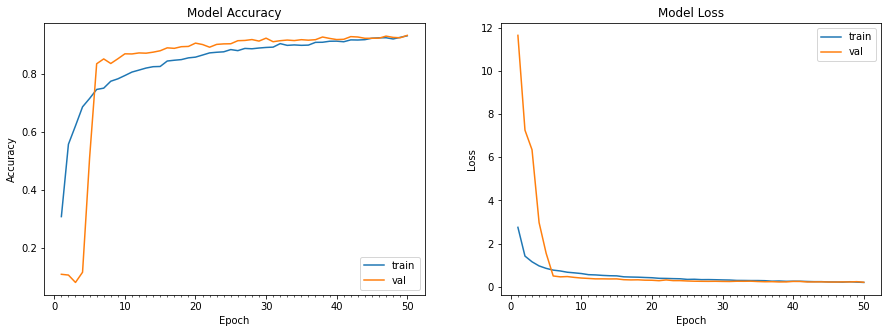

In [27]:
def plot_model_history(model_history, accuracy='accuracy', val_accurary='val_accuracy'):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    axs[0].plot(range(1,len(model_history.history[accuracy])+1),model_history.history[accuracy])
    axs[0].plot(range(1,len(model_history.history[val_accurary])+1),model_history.history[val_accurary])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history[accuracy])+1),len(model_history.history[accuracy])/10)
    axs[0].legend(['train', 'val'], loc='best')
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()
    
plot_model_history(history)

In [28]:
y_val_pred = model.predict(validation_data)
y_val_final = np.argmax(y_val_pred, axis=1)
y_val_final.size

2300

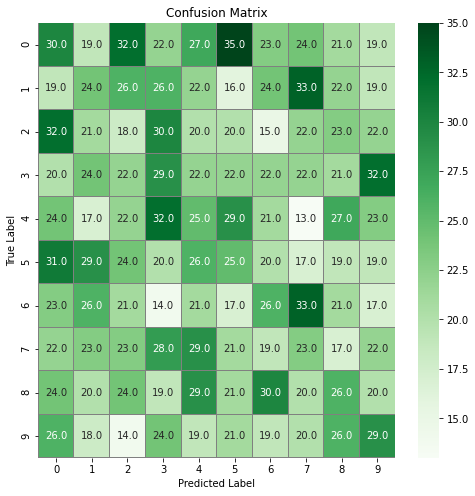

In [29]:
from sklearn.metrics import confusion_matrix
# Predict the values from the validation dataset
# compute the confusion matrix
confusion_mtx = confusion_matrix(np.argmax(y_val, axis=1), y_val_final) 
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [30]:
from sklearn.metrics import classification_report

# Generate a classification report
report = classification_report(np.argmax(y_val, axis=1), y_val_final, target_names=['0','1','2','3','4','5','6','7','8','9'])

print(report)

              precision    recall  f1-score   support

           0       0.12      0.12      0.12       252
           1       0.11      0.10      0.11       231
           2       0.08      0.08      0.08       223
           3       0.12      0.12      0.12       236
           4       0.10      0.11      0.11       233
           5       0.11      0.11      0.11       230
           6       0.12      0.12      0.12       219
           7       0.10      0.10      0.10       227
           8       0.12      0.11      0.11       233
           9       0.13      0.13      0.13       216

    accuracy                           0.11      2300
   macro avg       0.11      0.11      0.11      2300
weighted avg       0.11      0.11      0.11      2300



In [31]:
# prepare test data and predit
test_gen = ImageDataGenerator(rescale=1./255)
test_data = test_gen.flow(x_test, y_test, batch_size=batch_size)

In [32]:
y_test_pred = model.predict(test_data)
y_test_final = np.argmax(y_test_pred, axis=1)
y_test_final.size

1395

In [33]:
 for i in y_test_final:
  if i == 0:
    print('apple')
  elif i == 1:
    print('cabbage')
  elif i == 2:
    print('carrot')
  elif i == 3:
    print('chicken')
  elif i == 4:
    print('cucumber')
  elif i == 5:
    print('egg')
  elif i == 6:
    print('mushroom')
  elif i == 7:
    print('potato')
  elif i == 8:
    print('radish')
  elif i == 9:
    print('tomato')
  else: 
    print('圖片無法辨識，請輸入文字...')

carrot
radish
egg
cucumber
tomato
radish
apple
carrot
carrot
potato
tomato
egg
cucumber
egg
apple
carrot
potato
apple
carrot
tomato
cucumber
apple
cucumber
radish
cucumber
cucumber
apple
egg
egg
carrot
carrot
cucumber
carrot
tomato
egg
apple
carrot
carrot
apple
egg
egg
egg
chicken
carrot
egg
cucumber
mushroom
apple
egg
tomato
cucumber
cabbage
carrot
cucumber
potato
tomato
cucumber
egg
radish
potato
radish
radish
tomato
egg
tomato
egg
cucumber
radish
egg
apple
cabbage
cucumber
egg
egg
tomato
tomato
cucumber
apple
tomato
cucumber
tomato
radish
carrot
egg
chicken
egg
potato
apple
radish
potato
potato
cucumber
carrot
tomato
egg
egg
egg
chicken
radish
cabbage
mushroom
tomato
tomato
egg
carrot
tomato
chicken
carrot
tomato
carrot
apple
apple
tomato
cucumber
tomato
radish
carrot
egg
apple
egg
egg
potato
apple
chicken
carrot
egg
cucumber
tomato
tomato
apple
potato
cucumber
potato
apple
apple
cucumber
carrot
mushroom
radish
tomato
radish
tomato
apple
apple
apple
apple
egg
potato
apple
chicken
eg

In [38]:
# load model
model = load_model('model-food-final-res.h5')
# load images
test_dataset_path = '/content/drive/My Drive/Tibame/dataset/test2'
test_filenames = os.listdir(test_dataset_path)
test_df = pd.DataFrame({'filename': test_filenames})
nb_samples = test_df.shape[0]
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(test_df, 
    test_dataset_path, 
    x_col='filename',
    y_col=None,
    class_mode=None,
    batch_size=7,
    target_size=(200, 200),
    shuffle=False)

Found 2 validated image filenames.


In [39]:
test_df

,filename
0,1259865.jpg
1,1259860.jpg


In [40]:
predict = model.predict_generator(test_generator, steps=np.ceil(nb_samples/batch_size))
test_df['category'] = pd.DataFrame(np.argmax(predict, axis=1))
test_df['category']

Instructions for updating:
Please use Model.predict, which supports generators.


0    0
1    0
Name: category, dtype: int64

In [41]:
 for i in test_df['category']:
  if i == 0:
    print('apple')
  elif i == 1:
    print('cabbage')
  elif i == 2:
    print('carrot')
  elif i == 3:
    print('chicken')
  elif i == 4:
    print('cucumber')
  elif i == 5:
    print('egg')
  elif i == 6:
    print('mushroom')
  elif i == 7:
    print('potato')
  elif i == 8:
    print('radish')
  elif i == 9:
    print('tomato')
  else: 
    print('圖片無法辨識，請輸入文字...')

apple
apple
